In [ ]:
import torch
import torchfcn
import torchvision
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import fcn

#### Understand the datasets for training and cross-validation¶

In [2]:
# Assume the datasets are downloaded to the loc. below
root = osp.expanduser('~/data/datasets')

In [3]:
def imshow(img):
    plt.imshow(img)
    plt.show()
    
def hist(img):
    plt.hist(img)
    plt.show()

#### Dataset for the cityscapes dataset

In [4]:

# Note: we set the transform to False, this ensures that the result of __get_item is an 
# ndarray, not a tensor.
train_dataset = torchfcn.datasets.CityScape(root, split='train', transform=False)
print(train_dataset)
print(f"Number of entries in the training: {len(train_dataset)}")

Number of entries in the training: 2975


Shape of image:  (1024, 2048, 3) shape of the label:  (1024, 2048)


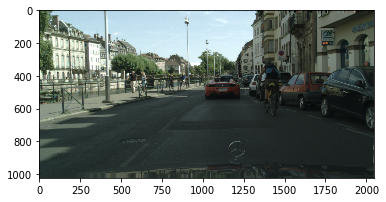

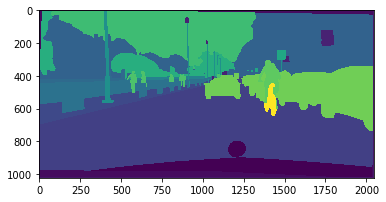

In [5]:
idx = 459
print("Shape of image: ", train_dataset[idx][0].shape, "shape of the label: ", train_dataset[idx][1].shape)
imshow(train_dataset[idx][0])
imshow(train_dataset[idx][1])
# print(train_dataset[idx][1])

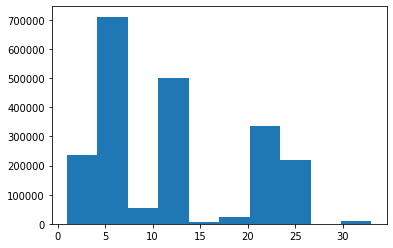

In [6]:
label_dist = np.ravel(train_dataset[idx][1])
hist(label_dist)

#### Ensure that a transformed tensor loads

tensor(1)
Max 33 Min 1


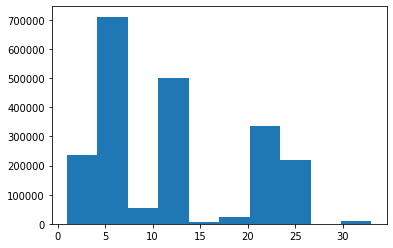

In [7]:
## Let us actually inspect the transformed tensor data instead
valid_tensor_dataset = torchfcn.datasets.CityScape(root, split='train', transform=True)

label_dists = valid_tensor_dataset[idx][1]
print(torch.min(label_dists))

label_dist = np.ravel(label_dists.numpy())
print("Max", np.max(label_dist), "Min", np.min(label_dist))
hist(label_dist)

#### Lets checkout the validation set

In [8]:
# Note: we set the transform to False, this ensures that the result of __get_item is an 
# ndarray, not a tensor.
val_dataset = torchfcn.datasets.CityScape(root, split='val', transform=False)
print(val_dataset)
print(f"Number of entries in the training: {len(val_dataset)}")

Number of entries in the training: 500


Shape of image:  (1024, 2048, 3) shape of the label:  (1024, 2048)


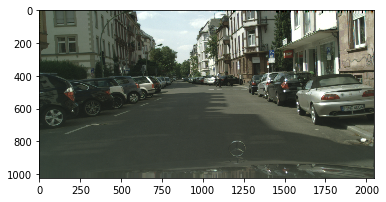

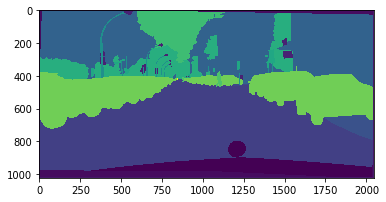

In [9]:
idx = 459
print("Shape of image: ", val_dataset[idx][0].shape, "shape of the label: ", val_dataset[idx][1].shape)
imshow(val_dataset[idx][0])
imshow(val_dataset[idx][1])
# print(train_dataset[idx][1])

#### Inspect the dataset transformed?

In [10]:
mean_bgr = np.array([104.00698793, 116.66876762, 122.67891434])

def transform(img):
    #img = img[:, :, ::-1]  # RGB -> BGR
    img = img.astype(np.float64)
    img -= mean_bgr
    return img

In [12]:
print(val_dataset[idx][0].shape)
transformed_image = transform(val_dataset[idx][0])
print(transformed_image.shape)

(1024, 2048, 3)
(1024, 2048, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


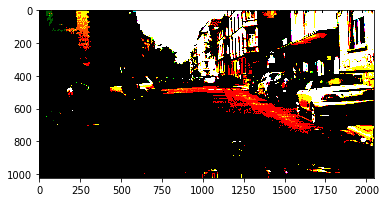

In [13]:
imshow(transformed_image)